In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf


AttributeError: type object 'h5py.h5r.Reference' has no attribute '__reduce_cython__'

In [11]:
train = pd.read_csv("C:/Users/LENOVO/Downloads/jupyter notebooks/digit recogniser/train.csv")
test = pd.read_csv("C:/Users/LENOVO/Downloads/jupyter notebooks/digit recogniser/test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y_train = train['label'].astype('float32')
X_train = train.drop(['label'], axis=1).astype('int32')
X_test = test.astype('float32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

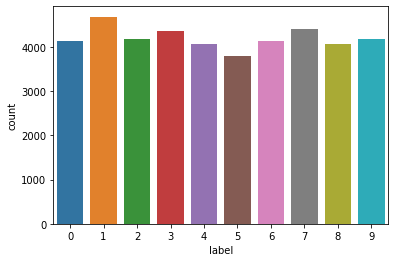

In [15]:

sns.countplot(x='label', data=train)

In [16]:
# Data normalization
X_train = X_train/255
X_test = X_test/255

In [32]:

X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [17]:
# one-hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

AttributeError: type object 'h5py.h5r.Reference' has no attribute '__reduce_cython__'

In [34]:
print(train['label'].head())
y_train[0:5,:]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

In [36]:

from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [37]:
# Building a CNN model
input_shape = (28,28,1)
X_input = Input(input_shape)

# layer 1
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)
# layer 2
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)
# layer 3
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)
# fc
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)

conv_model = Model(inputs=X_input, outputs=x, name='Predict')
conv_model.summary()

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 32)        128 

In [24]:
# Adam optimizer
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_cv,y_cv))

Epoch 1/10
341/341 [==============================] - 62s 173ms/step - loss: 1.1298 - accuracy: 0.6232 - val_loss: 1.1101 - val_accuracy: 0.6045
Epoch 2/10
341/341 [==============================] - 58s 172ms/step - loss: 0.1496 - accuracy: 0.9577 - val_loss: 0.0679 - val_accuracy: 0.9802
Epoch 3/10
341/341 [==============================] - 58s 170ms/step - loss: 0.1020 - accuracy: 0.9730 - val_loss: 0.0687 - val_accuracy: 0.9796
Epoch 4/10
341/341 [==============================] - 50s 146ms/step - loss: 0.0806 - accuracy: 0.9777 - val_loss: 0.0459 - val_accuracy: 0.9862
Epoch 5/10
341/341 [==============================] - 44s 129ms/step - loss: 0.0660 - accuracy: 0.9817 - val_loss: 0.0493 - val_accuracy: 0.9857
Epoch 6/10
341/341 [==============================] - 44s 128ms/step - loss: 0.0567 - accuracy: 0.9836 - val_loss: 0.0379 - val_accuracy: 0.9889
Epoch 7/10
341/341 [==============================] - 43s 127ms/step - loss: 0.0492 - accuracy: 0.9870 - val_loss: 0.0423 - val_ac

In [26]:

# SGD optimizer
sgd = SGD(lr=0.0005, momentum=0.5, decay=0.0, nesterov=False) 
conv_model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv))

C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  def get_gradients(self, loss, params):


Epoch 1/30
1064/1064 [==============================] - 44s 40ms/step - loss: 0.0372 - accuracy: 0.9902 - val_loss: 0.0399 - val_accuracy: 0.9910
Epoch 2/30
1064/1064 [==============================] - 42s 40ms/step - loss: 0.0269 - accuracy: 0.9934 - val_loss: 0.0402 - val_accuracy: 0.9907
Epoch 3/30
1064/1064 [==============================] - 42s 39ms/step - loss: 0.0229 - accuracy: 0.9941 - val_loss: 0.0391 - val_accuracy: 0.9910
Epoch 4/30
1064/1064 [==============================] - 42s 40ms/step - loss: 0.0245 - accuracy: 0.9936 - val_loss: 0.0389 - val_accuracy: 0.9913
Epoch 5/30
1064/1064 [==============================] - 42s 40ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.0381 - val_accuracy: 0.9915
Epoch 6/30
1064/1064 [==============================] - 43s 41ms/step - loss: 0.0219 - accuracy: 0.9938 - val_loss: 0.0374 - val_accuracy: 0.9910
Epoch 7/30
1064/1064 [==============================] - 44s 41ms/step - loss: 0.0201 - accuracy: 0.9942 - val_loss: 0.0376 -

In [1]:

y_pred = conv_model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
my_submission.to_csv('submission.csv', index=False)
train = raw_train.map(tf.autograph.experimental.do_not_convert)


NameError: name 'conv_model' is not defined